# Project: Write a data science blog post for the Bakery analysis

## Data set details

<a> Data set: BreadBasket_DMS.csv </a>

<a> Data credit: Kaggle</a>

<a> Brief description: To understand the customer behavior and analyze the sales of a bakery.</a>

## Exploratory Data Analysis


<a>Performing EDA will help to understand the dataset and its features to select afind the label of prediction</a>

<a>Import Libraries</a>

In [24]:
# Importation of libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
print(f'Libraries loaded!')

Libraries loaded!


<a> Importing Dataset </a>

In [25]:
# Open and Creating the dataset
df_initial = pd.read_csv('BreadBasket_DMS.csv', header = 0)
df_initial.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


<a> Analysing data </a>

In [3]:
# Dataset info
display(df_initial.info())

# Descriptive statistics of the data
display(df_initial.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


None

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


<a> missing value Identification </a>

In [27]:
# Identify missing values on dataset
print('  ' * 10 + " Display information about column types and number of null values " + '  ' * 10 )
print('--' * 50)

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values (%)'}))

if(any(df_initial.isnull().any())):
    print()
    display(tab_info)
else:
    print('NO missing data')

                     Display information about column types and number of null values                     
----------------------------------------------------------------------------------------------------
NO missing data


C:\Users\priya\AppData\Local\Temp\ipykernel_58852\567845142.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
C:\Users\priya\AppData\Local\Temp\ipykernel_58852\567845142.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values (%)'}))


<a> Hidden value identification </a>

In [6]:
#Let's check the 'hidden' missing values in the dataset
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]

print('---------------------------------------------------------')
print("There are {0} 'hidden' missing values in the 'Item'column.".format(len(df_initial[df_initial.Item.isin(missing_value)])))
print("There are {0} 'hidden' missing values in the 'Transaction'.".format(len(df_initial[df_initial.Transaction.isin(missing_value)])))
print('---------------------------------------------------------')
df_initial[df_initial.Item.isin(missing_value)].head()

---------------------------------------------------------
There are 786 'hidden' missing values in the 'Item'column.
There are 0 'hidden' missing values in the 'Transaction'.
---------------------------------------------------------


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE


<a> Drop the missing values </a>

In [7]:
# Selecting the row values to drop in the selected column
bread = df_initial.drop(df_initial[df_initial.Item == "NONE"].index)
print("Number of rows: {0:,} (original 21,293) ".format(len(bread)))
print('----------------------------------------')
bread.head()

# After removing the missing values, the number of rows left is 20,507 (original 21,293 minus 786 missing)

Number of rows: 20,507 (original 21,293) 
----------------------------------------


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


<a> creating a new column datetimeindex to our dataset </a>

In [8]:
# Creating a column of DateTimeIndex
bread['Datetime'] = pd.to_datetime(bread['Date'] + ' ' + bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head()

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam


<a> Extracting hours and days of the week </a>

In [9]:
# Extract hour of the day and weekday of the week
# For Datetimeindex: the day of the week are Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7
bread["Hour"] = bread.index.hour
bread["Weekday"] = bread.index.weekday + 1

bread.head()

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7


<a> Exploring data </a>

In [10]:
total_items = len(bread)
total_days = len(np.unique(bread.index.date))
total_months = len(np.unique(bread.index.month))
average_items = int(total_items / total_days)
unique_items = bread.Item.unique().size

print("Total unique_items: {} sold by the Bakery".format(unique_items))
print('-----------------------------')
print("Total sales: {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print('-----------------------------')
print("Average_items daily sales: {}".format(average_items))

Total unique_items: 94 sold by the Bakery
-----------------------------
Total sales: 20507 items sold in 159 days throughout 7 months
-----------------------------
Average_items daily sales: 128


<a> Q1.Top 10 selling Items </a>

In [11]:
# Rank the top 10 best-selling items
counts = bread.Item.value_counts()
percent = bread.Item.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
top_10 = pd.DataFrame({'counts': counts, '%': percent})[:10]

print('-----------------------------')
print('Top 10 items')
print('-----------------------------')
display(top_10)

-----------------------------
Top 10 items
-----------------------------


,counts,%
Coffee,5471,26.7%
Bread,3325,16.2%
Tea,1435,7.0%
Cake,1025,5.0%
Pastry,856,4.2%
Sandwich,771,3.8%
Medialuna,616,3.0%
Hot chocolate,590,2.9%
Cookies,540,2.6%
Brownie,379,1.8%


<a> Barchart for top 10 selling items by percentage and number <a/>

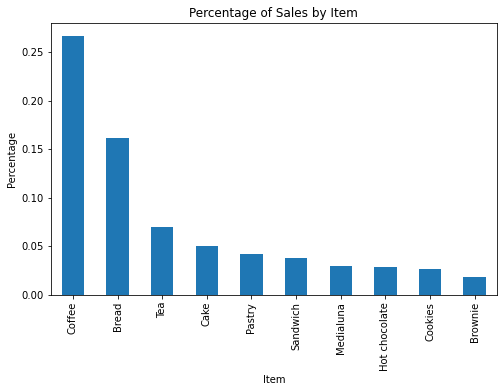

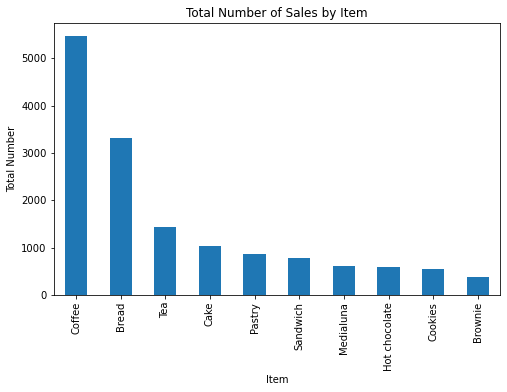

In [12]:
# Rank by percentage
plt.figure(figsize=(8,5))
bread.Item.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")
plt.show()

# Rank by value
plt.figure(figsize=(8,5))
bread.Item.value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")
plt.show()

## Analysis for Q1:##
#### Coffee,Bread and Tea always remain the best selling items irrespective of percentage or number.So in order to run a bakery thier primary focus should have a good coffee,tea and bread.

<a> Q2.Time series of number of items sold by day ,month and hour </a>

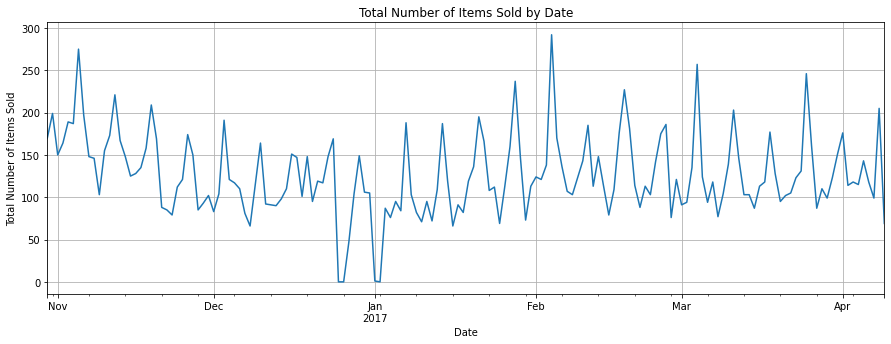

In [13]:
# Number of items sold by day
bread["Item"].resample("D").count().plot(figsize=(15,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

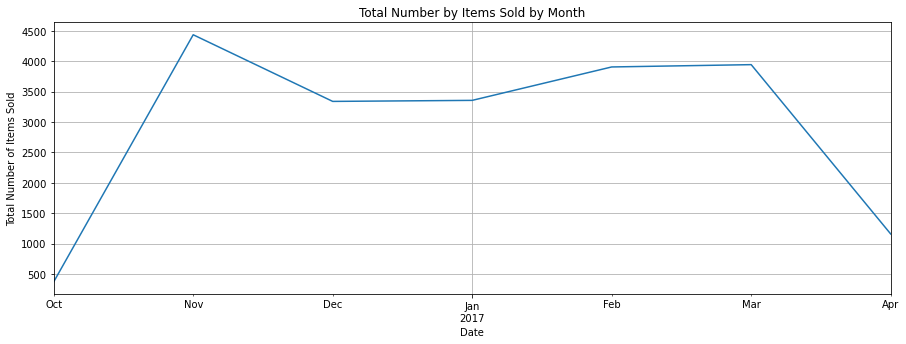

In [14]:
# Number of items sold by month
bread["Item"].resample("M").count().plot(figsize=(15,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

           Item
Hour           
1      0.006289
7      0.150943
8      4.056604
9     12.364780
10    16.767296
11    19.509434
12    17.949686
13    16.459119
14    16.603774
15    13.301887
16     8.446541
17     2.314465
18     0.515723
19     0.301887
20     0.138365
21     0.018868
22     0.050314
23     0.018868


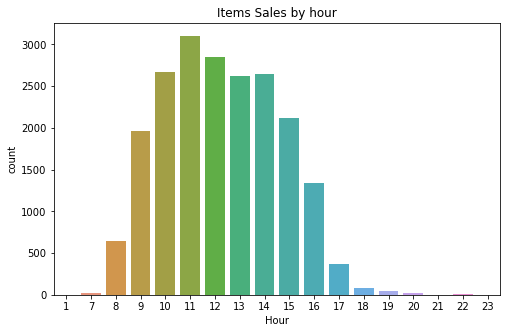

In [15]:
# Aggregate item sold by hour
bread_groupby_hour = bread.groupby("Hour").agg({"Item": lambda item: item.count()/total_days})
print(bread_groupby_hour)

# Plot items sold by hour
plt.figure(figsize=(8,5))
sns.countplot(x='Hour',data=bread)
plt.title('Items Sales by hour')
plt.show()

## Analysis for Q2: ##
#### From the analysis we understand the lunch time is the peak time sales where the business can be taken to next level though the date and month calculation are made.

<a>Q3.Sales by weekday </a>

In [16]:
# sales groupby weekday
bread_groupby_weekday = bread.groupby("Weekday").agg({"Item": lambda item: item.count()})
bread_groupby_weekday.head()

,Item
Weekday,
1,2324
2,2392
3,2321
4,2646
5,3124


In [21]:
# but we need to find out how many in each weekday period of transaction
# in order to calculate the average items per weekday

import datetime 
daterange = pd.date_range(datetime.date(2016, 10, 30), datetime.date(2017, 4, 9))

monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
sunday = 0

for day in np.unique(bread.index.date):
    if day.isoweekday() == 1:
        monday += 1
    elif day.isoweekday() == 2:
        tuesday += 1
    elif day.isoweekday() == 3:
        wednesday += 1
    elif day.isoweekday() == 4:
        thursday += 1        
    elif day.isoweekday() == 5:
        friday += 1        
    elif day.isoweekday() == 6:
        saturday += 1        
    elif day.isoweekday() == 7:
        sunday += 1        
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday

print("monday = {0}, tuesday = {1}, wednesday = {2}, thursday = {3}, friday = {4}, saturday = {5}, sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))

monday = 21, tuesday = 23, wednesday = 23, thursday = 23, friday = 23, saturday = 23, sunday = 23, total = 159


In [22]:
# apply the conditions to calculate the average items for each weekday
conditions = [
    (bread_groupby_weekday.index == 1),
    (bread_groupby_weekday.index == 2),
    (bread_groupby_weekday.index == 3),
    (bread_groupby_weekday.index == 4),
    (bread_groupby_weekday.index == 5),
    (bread_groupby_weekday.index == 6),
    (bread_groupby_weekday.index == 7)]

choices = [bread_groupby_weekday.Item/21, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23]

bread_groupby_weekday["Average"] = np.select(conditions, choices, default=0)
bread_groupby_weekday

,Item,Average
Weekday,,
1,2324,110.666667
2,2392,104.000000
3,2321,100.913043
4,2646,115.043478
5,3124,135.826087
6,4605,200.217391
7,3095,134.565217


<a> Weekday sales chart </a>

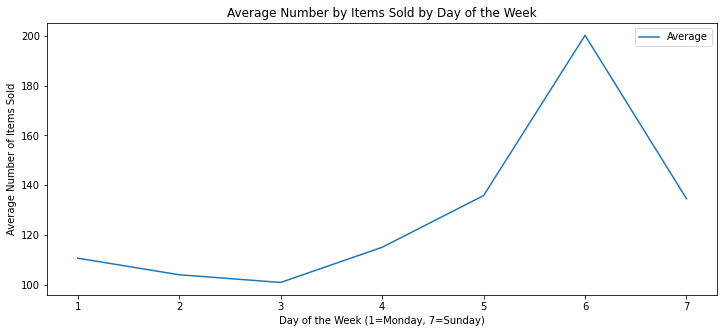

In [23]:
bread_groupby_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")
plt.show()

## Analysis for Q3. ##
#### As weekend(friday,saturday and sunday) shows more in sales, the bakery can produce more in those days and reduce in the others days which will help in reduce loss. Another strategy is giving promotions in week days alone to increase the sales and attract more customers. ####